In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns



c:\users\azfar\python\python35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
file = 'D:/kaggle/ks-projects-201801.csv'
df = pd.read_csv(file, encoding='latin-1')

In [5]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [6]:
# Data Cleaning
df = df[df['goal'] > 100]   # Assuming that no sound project should be <$100
df = df[df['backers'] > 0]  # Assuming that no sound project should have backers == 0
df['year'] = pd.to_datetime(df['launched']).dt.year # Add year column
df['project_duration'] = pd.to_datetime(pd.to_datetime(df['deadline']) - \
                pd.to_datetime(df['launched'])).dt.day # Determine each project duration

df = df[~df['year'].isin(['1970', '2018'])] # Exclude 1970 and 2018
df['avg_backer_invest'] = df['pledged']/df['backers']

In [9]:
# Overall project split
all_cat = df['main_category'].value_counts()
all_cat

Film & Video    52896
Music           42320
Publishing      32175
Games           32019
Design          27900
Technology      26900
Art             23320
Food            19807
Fashion         18141
Comics          10090
Theater          9959
Photography      8634
Crafts           6840
Journalism       3476
Dance            3475
Name: main_category, dtype: int64

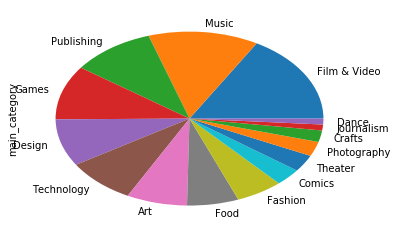

In [10]:
# Plot the categories
all_cat.plot.pie()
plt.show()

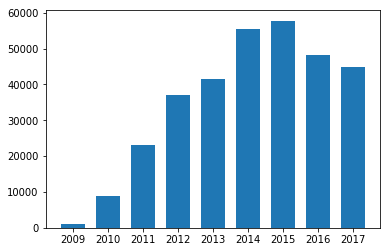

In [12]:
# Project counts by year
annual_growth = df.year.value_counts().sort_index()
index = annual_growth.index.tolist()
vals = annual_growth.tolist()

N = len(index)
ind = np.arange(N)
width = 0.7

plt.bar(ind, vals, width=width)
plt.xticks(ind, index)
plt.show()

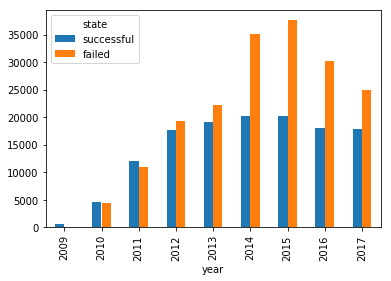

In [14]:
state_year_df = df[['year', 'state']]
state_year_df = state_year_df.pivot_table(index='year', columns='state', aggfunc=len)
state_year_df['failed'] = state_year_df['canceled'] + state_year_df['failed']+ state_year_df['suspended']
state_year_df = state_year_df[['successful', 'failed']]
state_year_df.plot.bar()
plt.show()

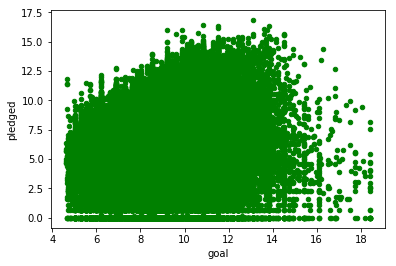

In [15]:
# Scatter plot GOALS vs Pledged (LOG)
goal_pledged_df = df[['goal', 'pledged']]
goal_pledged_df = goal_pledged_df.apply(np.log, axis=1)
goal_pledged_df.plot.scatter(x='goal', y='pledged', c='green')
plt.show()

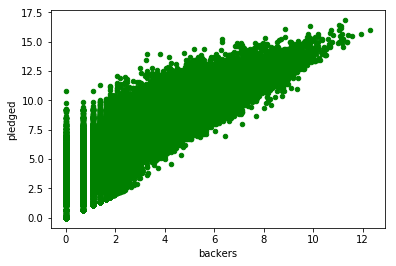

In [16]:
# Pledged VS Backers
pledged_backers_df = df[['backers', 'pledged']]
pledged_backers_df = pledged_backers_df.apply(np.log, axis=1)
pledged_backers_df.plot.scatter(x='backers', y='pledged', c='green')
plt.show()

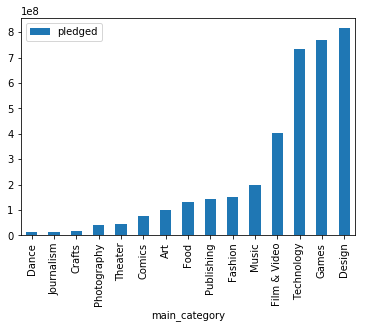

In [17]:
# Highest Pledging Categories
category_pledged_df = df[['main_category', 'pledged']].pivot_table(index='main_category', aggfunc=sum)
category_pledged_df = category_pledged_df.sort_values('pledged')
category_pledged_df.plot.bar()
plt.show()

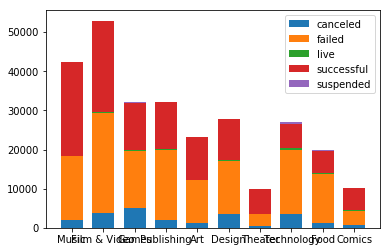

In [18]:
# Top 10 categories analysis of success and failure
subdf = df[['main_category', 'state']]
pivot = subdf.pivot_table(index='main_category', columns='state', aggfunc=len)
pivot = pivot.sort_values(by='successful', ascending=False) [:10] # Top 10 categories
attrs = pivot.index.tolist()
attr_vals = np.array(pivot.values.tolist()).T

N = len(attrs)
ind = np.arange(N)
width = 0.7
# Stacking under each state
p1 = plt.bar(ind, attr_vals[0], width)
p2 = plt.bar(ind, attr_vals[1], width, bottom=attr_vals[0])
p3 = plt.bar(ind, attr_vals[2], width, bottom=attr_vals[0]+attr_vals[1])
p4 = plt.bar(ind, attr_vals[3], width, bottom=attr_vals[0]+attr_vals[1]+attr_vals[2])
p5 = plt.bar(ind, attr_vals[4], width, bottom=attr_vals[0]+attr_vals[1]+attr_vals[2]+attr_vals[3])

plt.legend([p1[0], p2[0], p3[0], p4[0], p5[0]], ['canceled', 'failed', 'live', 'successful', 'suspended', 'undefined'])
plt.xticks(ind, attrs)
plt.show()

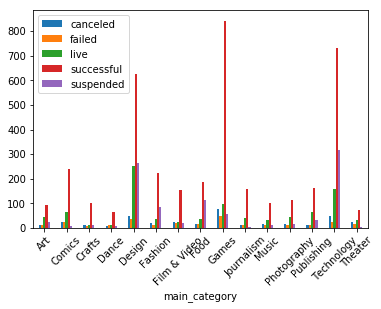

In [19]:
# Project state and Backers
backersdf = df[['main_category', 'state', 'backers']]
backers_pivot = backersdf.pivot_table(index='main_category', columns='state', aggfunc='mean')
cols = np.array(backers_pivot.columns.tolist()).T[1]
backers_pivot.plot.bar()
plt.legend(cols)
plt.xticks(rotation=45)
plt.show()

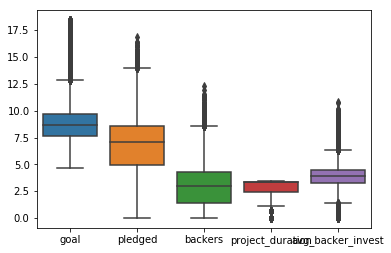

In [20]:
# Box plots for numerical data
box_df = df[['goal', 'pledged', 'backers', 'project_duration', 'avg_backer_invest']]
box_df = box_df.apply(np.log, axis=1)
box_df['state'] = df['state']
sns.boxplot(data=box_df)
plt.show()

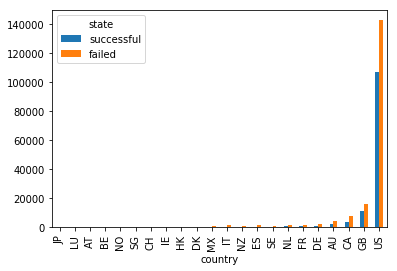

In [26]:
# Country VS Success of projects
subdf_countries = df[['state', 'country']]
subdf_countries = subdf_countries.pivot_table(index='country', columns='state', aggfunc=len)
subdf_countries['failed'] = subdf_countries['canceled']+subdf_countries['failed']+subdf_countries['suspended']
subdf_countries = subdf_countries[['successful', 'failed']].sort_values('successful')
subdf_countries.plot.bar()
plt.show()

In [25]:
# Applying classification models
data = df[df['state'].isin(['successful', 'failed'])] # Just working with either successful or failed projects
X = data[['main_category', 'country', 'goal', 'pledged', 'backers',
		   'project_duration', 'avg_backer_invest']] # Selecting features from data
X = pd.get_dummies(X, columns=['main_category', 'country']) # Converting to dummies for modeling purposes
X = X.as_matrix()
y = data['state'].as_matrix()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Decision Tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Decision Tree: {}%'.format(accuracy*100))

Accuracy of Decision Tree: 99.91557765699086%
